<a href="https://colab.research.google.com/github/Nico5144/mnist-ml-project/blob/main/notebooks/3_mlp_model_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Imports and data reload

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# 1. Load MNIST

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Normalize to [0,1]

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0

# 3. One‑hot encode labels for Keras

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test,  num_classes=10)


In [41]:
model = Sequential([
    Flatten(input_shape=(28, 28)),      # flatten 2D → 1D vector
    Dense(256, activation='relu'),      # hidden layer
    Dropout(0.4),                       # regularize and reduce overfitting
    Dense(128, activation='relu'),      # second hidden layer
    Dropout(0.3),                       # regularize and reduce overfitting
    Dense(64, activation='relu'),       # third hidden layer
    Dense(10, activation='softmax')     # output layer for 10 classes
])


In [42]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Stop early if validation loss doesn’t improve in 3 epochs

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    callbacks=[es],
    verbose=2
)


Epoch 1/20
422/422 - 5s - 13ms/step - accuracy: 0.8527 - loss: 0.4705 - val_accuracy: 0.9617 - val_loss: 0.1274
Epoch 2/20
422/422 - 5s - 11ms/step - accuracy: 0.9419 - loss: 0.1944 - val_accuracy: 0.9712 - val_loss: 0.0916
Epoch 3/20
422/422 - 4s - 10ms/step - accuracy: 0.9550 - loss: 0.1522 - val_accuracy: 0.9752 - val_loss: 0.0830
Epoch 4/20
422/422 - 4s - 10ms/step - accuracy: 0.9614 - loss: 0.1302 - val_accuracy: 0.9818 - val_loss: 0.0679
Epoch 5/20
422/422 - 5s - 12ms/step - accuracy: 0.9646 - loss: 0.1158 - val_accuracy: 0.9782 - val_loss: 0.0734
Epoch 6/20
422/422 - 4s - 10ms/step - accuracy: 0.9693 - loss: 0.1011 - val_accuracy: 0.9803 - val_loss: 0.0731
Epoch 7/20
422/422 - 3s - 7ms/step - accuracy: 0.9714 - loss: 0.0920 - val_accuracy: 0.9813 - val_loss: 0.0647
Epoch 8/20
422/422 - 5s - 13ms/step - accuracy: 0.9730 - loss: 0.0867 - val_accuracy: 0.9833 - val_loss: 0.0654
Epoch 9/20
422/422 - 5s - 12ms/step - accuracy: 0.9756 - loss: 0.0801 - val_accuracy: 0.9808 - val_loss: 

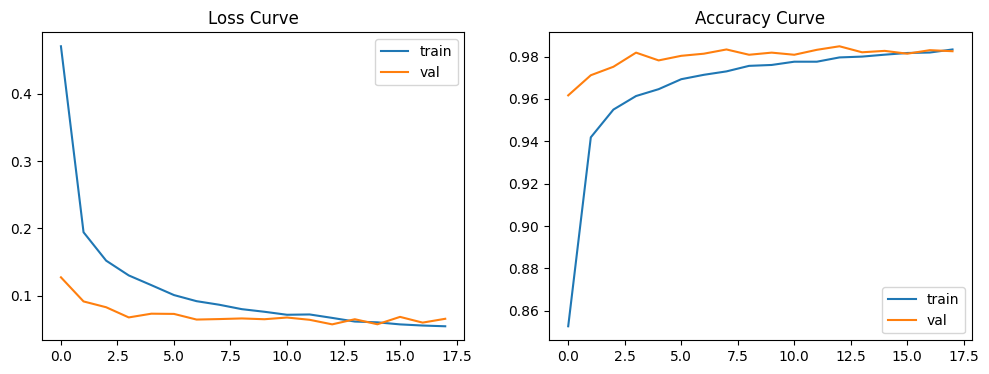

In [43]:
import matplotlib.pyplot as plt

# Loss curves

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss Curve')
plt.legend()

# Accuracy curves

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy Curve')
plt.legend()
plt.show()


Data from run 1:

Epoch 1/20
422/422 - 5s - 11ms/step - accuracy: 0.8660 - loss: 0.4488 - val_accuracy: 0.9578 - val_loss: 0.1475

Epoch 2/20
422/422 - 4s - 10ms/step - accuracy: 0.9415 - loss: 0.1983 - val_accuracy: 0.9683 - val_loss: 0.1136

Epoch 3/20
422/422 - 2s - 5ms/step - accuracy: 0.9561 - loss: 0.1494 - val_accuracy: 0.9723 - val_loss: 0.0987

Epoch 4/20
422/422 - 4s - 9ms/step - accuracy: 0.9615 - loss: 0.1250 - val_accuracy: 0.9742 - val_loss: 0.0883

Epoch 5/20
422/422 - 2s - 5ms/step - accuracy: 0.9653 - loss: 0.1088 - val_accuracy: 0.9755 - val_loss: 0.0851

Epoch 6/20
422/422 - 2s - 6ms/step - accuracy: 0.9702 - loss: 0.0959 - val_accuracy: 0.9747 - val_loss: 0.0864

Epoch 7/20
422/422 - 3s - 6ms/step - accuracy: 0.9724 - loss: 0.0874 - val_accuracy: 0.9780 - val_loss: 0.0721

Epoch 8/20
422/422 - 3s - 7ms/step - accuracy: 0.9742 - loss: 0.0801 - val_accuracy: 0.9783 - val_loss: 0.0748

Epoch 9/20
422/422 - 3s - 7ms/step - accuracy: 0.9762 - loss: 0.0738 - val_accuracy: 0.9800 - val_loss: 0.0697

Epoch 10/20
422/422 - 4s - 11ms/step - accuracy: 0.9773 - loss: 0.0680 - val_accuracy: 0.9803 - val_loss: 0.0699

Epoch 11/20
422/422 - 2s - 5ms/step - accuracy: 0.9796 - loss: 0.0622 - val_accuracy: 0.9797 - val_loss: 0.0696

Epoch 12/20
422/422 - 3s - 6ms/step - accuracy: 0.9799 - loss: 0.0595 - val_accuracy: 0.9808 - val_loss: 0.0722

Epoch 13/20
422/422 - 3s - 7ms/step - accuracy: 0.9805 - loss: 0.0574 - val_accuracy: 0.9807 - val_loss: 0.0683

Epoch 14/20
422/422 - 4s - 10ms/step - accuracy: 0.9817 - loss: 0.0548 - val_accuracy: 0.9820 - val_loss: 0.0672

Epoch 15/20
422/422 - 2s - 6ms/step - accuracy: 0.9828 - loss: 0.0503 - val_accuracy: 0.9788 - val_loss: 0.0734

Epoch 16/20
422/422 - 3s - 6ms/step - accuracy: 0.9832 - loss: 0.0506 - val_accuracy: 0.9808 - val_loss: 0.0727

Epoch 17/20
422/422 - 3s - 7ms/step - accuracy: 0.9840 - loss: 0.0464 - val_accuracy: 0.9818 - val_loss: 0.0700

Notes on first run:

Wow! That progressed a lot faster than I was expecting. A starting accuracy as high as I got wasn't what I was expecting at the start, and then how fast it jupmed up was really impressive.

Test Accuracy for the first run was 97.87%, which is pretty good. It took 17 epochs, and only had ~1% improvement over the last 9.

Other data for run 1:


    Flatten(input_shape=(28, 28)),      # flatten 2D → 1D vector
    Dense(128, activation='relu'),      # hidden layer
    Dropout(0.3),                       # regularize and reduce overfitting
    Dense(64, activation='relu'),       # second hidden layer
    Dense(10, activation='softmax')     # output layer for 10 classes

I'm going to toy around with changing some values and see what new I can tweak, and where I can optimize

Adem. 1:
I tried adjusting some elements, and found that adding a thrid hidden layer increased outcom accuracy more than any other metric.

Now going to try decresing the dropout between layers 2 and 3 to see if it leads to increase. Next step is to try increasing dropout between 2 and 3, then trying to increase dropout between 1 and 2
  - nodes per layer are 256, 128, 64

Adem. 2:

Kept three layers, then tried adjusting weights with first testing high/low dropout between layers 2 and 3 (keeping dropout 1 constant at 0.3). There was minimal notcied change. After, I tried adjusting dropout 1 while keeping dropout 2 constant at 0.3.

Overall, I noticed minimal change, but did manage to get the model to rank with a final test accuracy of 98%+ on a semi-regular basis.

Next step is to play around with different model structures.

In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"MLP Test Accuracy: {test_acc:.4f}")


MLP Test Accuracy: 0.9803
